In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import tensorflow_datasets as tfds
import keras
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

data_dir_Toys = '/content/drive/MyDrive/Toys'
data_dir_Electronics = '/content/drive/MyDrive/Electronics'
data_dir_Furniture = '/content/drive/MyDrive/Furniture'

Mounted at /content/drive


In [ ]:
#ds2 = tfds.load('amazon_us_reviews/Electronics_v1_00', split='train', shuffle_files=True, data_dir=data_dir_Electronics)
#ds3 = tfds.load('amazon_us_reviews/Toys_v1_00', split='train', shuffle_files=True, data_dir=data_dir_Toys)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /content/drive/MyDrive/Toys/amazon_us_reviews/Toys_v1_00/0.1.0.incompleteZA0U5M/amazon_us_reviews-train.tfrecord


  0%|          | 0/4864249 [00:00<?, ? examples/s]

Dataset amazon_us_reviews downloaded and prepared to /content/drive/MyDrive/Toys/amazon_us_reviews/Toys_v1_00/0.1.0. Subsequent calls will reuse this data.


In [ ]:
#ds = tfds.load('amazon_us_reviews/Electronics_v1_00', data_dir=data_dir_Electronics, split='train', download=False)
#ds2 = tfds.load('amazon_us_reviews/Furniture_v1_00', data_dir=data_dir_Furniture, split='train', download=False)
#ds3 = tfds.load('amazon_us_reviews/Toys_v1_00', data_dir=data_dir_Toys, split='train', download=False)

In [ ]:
#df = tfds.as_dataframe(ds)
#df.head()

#df2 = tfds.as_dataframe(ds2)
#df2.head()

#df3= tfds.as_dataframe(ds3)
#df3.head()

In [ ]:
#df3['data/review_body'] = df3['data/review_body'].str.decode("utf-8")
#df3 = df3[["data/review_body", "data/star_rating"]]



In [ ]:
#filepath = '/content/drive/MyDrive/Electronics.csv'
#df.to_csv(filepath) 

#filepathTOY = '/content/drive/MyDrive/TOYS.csv'
#df3.to_csv(filepathTOY) 

In [ ]:
#filepath = '/content/drive/MyDrive/Electronics.csv'
#df = pd.read_csv(filepath)
#df['data/review_body']=df['data/review_body'].astype(str)

filepathTOY = '/content/drive/MyDrive/TOYS.csv'
df = pd.read_csv(filepathTOY)
df['data/review_body']=df['data/review_body'].astype(str)

In [ ]:
#df['data/review_body'] = df['data/review_body'].str.replace(r'\b\w{1,3}\b', '')
#df = df.drop('Unnamed: 0', 1)
#df

In [ ]:
#df['data/star_rating'].value_counts()

5    3076922
4     769722
1     399503
3     387722
2     230380
Name: data/star_rating, dtype: int64

In [ ]:
#df1 = df[df['data/star_rating'] == 1]
#df2 = df[df['data/star_rating'] == 2]
#df3 = df[df['data/star_rating'] == 3]
#df4 = df[df['data/star_rating'] == 4]
#df5 = df[df['data/star_rating'] == 5]

In [ ]:
#df1 = df1.append(df2.append(df3.append(df4.append(df5,ignore_index=True),ignore_index=True),ignore_index=True),ignore_index=True)
#print(df1)

In [ ]:
#df1['data/star_rating'].value_counts()

In [ ]:
#df1 = df
#df1

In [ ]:
#df1['count'] = df1['data/review_body'].str.split().str.len()

In [ ]:
#df1 = df1[df1['count'] != 0]
#df1.sort_values(by=['count'])
#df1['count'].mean(skipna=True)

In [ ]:

#x=[0,50,100,150,200,250,300]
#y=[0,100000,200000,400000,800000,1200000.1600000,2000000]

#values = ['0', '1', '2', '3','4','5','6']
#values2 = ['0', '1', '2', '3','4','5','6']

#kwargs = dict(histtype='stepfilled', alpha=0.8, bins=100)

#plt.figure(figsize=(24, 8))
#plt.xticks(x,values)
#plt.yticks(y,values2)
#plt.hist(df1['count'], **kwargs, color = "red", ec="red")

In [ ]:
reviews = df['data/review_body']
labels =  df["data/star_rating"].subtract(1)
labels = labels.div(4)
#del df
#labels[labels == 0.25] = 0
#labels[labels == 0.75] = 1


In [ ]:
from sklearn.model_selection import train_test_split
reviews, temp2, labels, temp22 = train_test_split(reviews, labels, test_size=.89, random_state = 10)
#reviews, temp2, labels, temp22 = train_test_split(reviews, labels, test_size=.56, random_state = 10)
#training_sentences, test_sentences, training_labels, test_labels = train_test_split(reviews, labels, test_size=.1, random_state = 10)#, stratify = labels)
del temp2
del temp22
labels.value_counts()

1.00    338375
0.75     84970
0.00     43904
0.50     42291
0.25     25527
Name: data/star_rating, dtype: int64

In [ ]:
labels.value_counts()

1.00    338375
0.75     84970
0.00     43904
0.50     42291
0.25     25527
Name: data/star_rating, dtype: int64

In [ ]:
t = tf.keras.preprocessing.text.Tokenizer(num_words=10000)

t.fit_on_texts(reviews)

encoded_reviews = t.texts_to_sequences(reviews)
#encoded_train = t.texts_to_sequences(training_sentences)
#encoded_test = t.texts_to_sequences(test_sentences)

encoded_reviews = tf.keras.preprocessing.sequence.pad_sequences(encoded_reviews,padding='post',maxlen=300)
#encoded_train = tf.keras.preprocessing.sequence.pad_sequences(encoded_train,padding='post',maxlen=300) # 300 iyi
#encoded_test = tf.keras.preprocessing.sequence.pad_sequences(encoded_test,padding='post',maxlen=300)

#print(encoded_train)
#print(encoded_test)

#print(np.shape(encoded_train))
#print(np.shape(encoded_test))

#print(training_labels)
#print(test_labels)

In [ ]:
new_list = []
for i in range(len(encoded_reviews)):
    new_list.append(len(encoded_reviews[i]))

distinct_list = []
for i in range(len(encoded_reviews)):
    row = []
    for j in range(len(encoded_reviews[i])):
        if not encoded_reviews[i].__getitem__(j) in row:
            row.append(encoded_reviews[i].__getitem__(j))
    distinct_list.append(len(row))

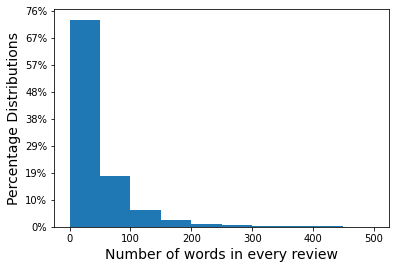

In [ ]:
import matplotlib.ticker as mtick
plt.hist(new_list, bins=10, range=[0 ,500])
plt.xlabel('Number of words in every review', fontsize=14)
plt.ylabel('Percentage Distributions', fontsize=14)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=2100000.0))

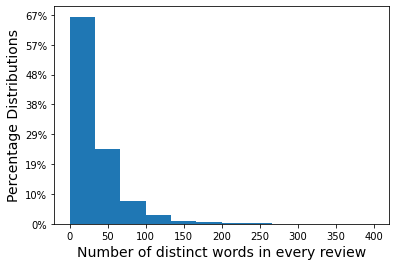

In [ ]:
plt.hist(distinct_list, bins=12, range=[0 ,400])
plt.xlabel('Number of distinct words in every review', fontsize=14)
plt.ylabel('Percentage Distributions', fontsize=14)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=2100000.0))

In [ ]:
#t.word_counts
#t.word_docs
#t.word_index
#t.document_count

#print(encoded_test)

#tttt = pd.DataFrame.from_dict(t.word_counts, orient='index')
#tttt = tttt.sort_values(by=[0])
#tttt.tail(10000)

#plt.hist(newarr1,  color = "red", ec="red")

[[ 106    0    0 ...    0    0    0]
 [1809   84  139 ...    0    0    0]
 [ 709    6   50 ...    0    0    0]
 ...
 [  11   68  667 ...    0    0    0]
 [ 382   19    0 ...    0    0    0]
 [ 107 1901  113 ...    0    0    0]]


In [ ]:
#model = tf.keras.Sequential([
#    tf.keras.layers.Embedding(input_dim=10000, output_dim=50, input_length=300),
#    tf.keras.layers.Bidirectional(keras.layers.LSTM(64)),
#    tf.keras.layers.Dense(24, activation='relu'),
#    tf.keras.layers.Dense(1, activation='sigmoid')
#])

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=10000, output_dim=128, input_length=300),
    tf.keras.layers.Bidirectional(keras.layers.LSTM(64,return_sequences=True)), 
    #tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Bidirectional(keras.layers.LSTM(32)), 
    #tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='mse',
              optimizer='adam',
              metrics=['mae','mse',tf.keras.metrics.RootMeanSquaredError()])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 300, 128)          1280000   
                                                                 
 bidirectional_2 (Bidirectio  (None, 300, 128)         98816     
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 24)                1560      
                                                                 
 dropout_1 (Dropout)         (None, 24)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                

In [ ]:
history = model.fit(encoded_train, training_labels, 
                    epochs=1, verbose=1, batch_size=128)#, validation_split=0.1)   

34202/34202 [==============================] - 1691s 49ms/step - loss: 0.0205 - mae: 0.0883 - mse: 0.0205 - root_mean_squared_error: 0.1433


In [ ]:
#CROSS-VALIDATION
from sklearn.model_selection import StratifiedKFold
drive_path = '/content/drive/MyDrive/'

skf = sklearn.model_selection.KFold(n_splits=5)
scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error']

def create_model():
  model = tf.keras.Sequential([
      tf.keras.layers.Embedding(input_dim=10000, output_dim=128, input_length=300),
      tf.keras.layers.Bidirectional(keras.layers.LSTM(64,return_sequences=True)), 
      #tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Bidirectional(keras.layers.LSTM(32)), 
      #tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(24, activation='relu'),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  model.compile(loss='mse',
                optimizer='adam',
                metrics=['mae','mse',tf.keras.metrics.RootMeanSquaredError()])
  
  return model

model = tf.keras.wrappers.scikit_learn.KerasRegressor(build_fn=create_model, epochs=3, batch_size=64, verbose=1,
               callbacks= tf.keras.callbacks.ModelCheckpoint( filepath=drive_path + 'final_crossval'))
#model.save(drive_path + 'final_3epoch_64batchsize')

scores = sklearn.model_selection.cross_validate(model, encoded_reviews, labels, cv=skf, scoring=scoring)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


Epoch 1/3
6689/6689 [==============================] - ETA: 0s - loss: 0.0358 - mae: 0.1243 - mse: 0.0358 - root_mean_squared_error: 0.1893

INFO:tensorflow:Assets written to: /content/drive/MyDrive/final_crossval/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/final_crossval/assets


6689/6689 [==============================] - 320s 47ms/step - loss: 0.0358 - mae: 0.1243 - mse: 0.0358 - root_mean_squared_error: 0.1893
Epoch 2/3
2602/6689 [==========>...................] - ETA: 2:58 - loss: 0.0268 - mae: 0.1043 - mse: 0.0268 - root_mean_squared_error: 0.1637

KeyboardInterrupt: ignored

In [ ]:
sorted(scores.keys())
print(scores['test_neg_mean_absolute_error'])
print(scores['test_neg_root_mean_squared_error'])
print(scores['test_neg_mean_squared_error'])
#print(scores.mean(), scores.std())

[-0.09973759 -0.09759051 -0.10132905 -0.09914577 -0.09641648]
[-0.16232344 -0.16428345 -0.16201525 -0.16170714 -0.16234903]
[-0.0263489  -0.02698905 -0.02624894 -0.0261492  -0.02635721]


In [ ]:
prediction = sklearn.model_selection.cross_val_predict(model, encoded_reviews, labels, cv=skf)

print("mae:",sklearn.metrics.mean_absolute_error(labels, prediction))
print("mse:",sklearn.metrics.mean_squared_error(labels, prediction, squared=True))
print("rmse:",sklearn.metrics.mean_squared_error(labels, prediction, squared=False))

Epoch 1/3
26754/26754 [==============================] - 1490s 55ms/step - loss: 0.0290 - mae: 0.1085 - mse: 0.0290 - root_mean_squared_error: 0.1702
Epoch 2/3
26754/26754 [==============================] - 1478s 55ms/step - loss: 0.0233 - mae: 0.0949 - mse: 0.0233 - root_mean_squared_error: 0.1526
Epoch 3/3
6689/6689 [==============================] - 148s 22ms/step
Epoch 1/3
26754/26754 [==============================] - 1484s 55ms/step - loss: 0.0290 - mae: 0.1082 - mse: 0.0290 - root_mean_squared_error: 0.1704
Epoch 2/3
26754/26754 [==============================] - 1494s 56ms/step - loss: 0.0233 - mae: 0.0946 - mse: 0.0233 - root_mean_squared_error: 0.1525
Epoch 3/3
6689/6689 [==============================] - 151s 22ms/step
Epoch 1/3
26754/26754 [==============================] - 1503s 56ms/step - loss: 0.0330 - mae: 0.1175 - mse: 0.0330 - root_mean_squared_error: 0.1816
Epoch 2/3
26754/26754 [==============================] - 1500s 56ms/step - loss: 0.0234 - mae: 0.0955 - mse: 0

In [ ]:
sorted(scores.keys())

['fit_time',
 'score_time',
 'test_neg_mean_absolute_error',
 'test_neg_mean_squared_error',
 'test_neg_root_mean_squared_error']

In [ ]:
#                                        val split   =     0 , 0.1
#model.save('/content/drive/MyDrive/my_model_1epoch')  0.187 , 0.201
#model.save('/content/drive/MyDrive/my_model_2epoch')  0.187 , 0.194
#model.save('/content/drive/MyDrive/my_model_5epoch')  0.189 , 0.190
#model.save('/content/drive/MyDrive/my_model_10epoch') 0.197 , 0.198
#model.save('/content/drive/MyDrive/my_model_20epoch') 0.202 , 0.202
#model.save('/content/drive/MyDrive/my_model_30epoch') 0.209 ,
#
#model.save('/content/drive/MyDrive/my_model_1epoch_100K')  0.164
#model.save('/content/drive/MyDrive/my_model_2epoch_100K')  0.149
#model.save('/content/drive/MyDrive/my_model_5epoch_100K')  0.147
#
#model.save('/content/drive/MyDrive/my_model_1epoch_770K_val')       0.105
#
#model.save('/content/drive/MyDrive/my_model_1epoch_770K_stratify')  0.106
#model.save('/content/drive/MyDrive/my_model_2epoch_770K_stratify')  0.102
#model.save('/content/drive/MyDrive/my_model_5epoch_770K_stratify')  0.096
#
#
#
#model.save('/content/drive/MyDrive/my_model_1epoch_770K')  0.103
#model.save('/content/drive/MyDrive/my_model_2epoch_770K')  0.099
#model.save('/content/drive/MyDrive/my_model_5epoch_770K')  0.096
#
#model.save('/content/drive/MyDrive/my_model_1epoch_770K_2lstm_NOdrop') #0.107
#
#model.save('/content/drive/MyDrive/my_model_1epoch_770K_2lstm_drop')  #0.100
#model.save('/content/drive/MyDrive/my_model_5epoch_770K_2lstm_drop')  #0.091
#model.save('/content/drive/MyDrive/my_model_10epoch_770K_2lstm_drop') #0.087
#
#model.save('/content/drive/MyDrive/my_model_1epoch_770K_2lstm_drop_adam0.01')  #0.115

In [ ]:
drive_path = '/content/drive/MyDrive/'
# PRO
#                                                                                     # 200 DEGİL 300
#model.save(drive_path + 'ELECTRONİCS_1epoch_PRO_3M_2lstm_drop_DIM_200-20000')        #0.122 / 0.184
#
#                                                                                     # 200 DEGİL 300
#model.save(drive_path + 'ELECTRONİCS_1epoch_PRO_3M_2lstm_drop_DIM_200-10000')        #0.115 / 0.180
#model.save(drive_path + 'ELECTRONİCS_2epoch_PRO_3M_2lstm_drop_DIM_200-10000')        #0.114 / 0.171
#model.save(drive_path + 'ELECTRONİCS_3epoch_PRO_3M_2lstm_drop_DIM_200-10000')        #0.108 / 0.167
#model.save(drive_path + 'ELECTRONİCS_5epoch_PRO_3M_2lstm_drop_DIM_200-10000')        #0.101 / 0.163
#model.save(drive_path + 'ELECTRONİCS_10epoch_PRO_3M_2lstm_drop_DIM_200-10000')       #0.111 / 0.172
#
#                                                                                                # 200 DEGİL 300
#model.save(drive_path + 'ELECTRONİCS_1epoch_PRO_3M_2lstm_drop_DIM_200-10000_outputdim-128')     #0.114 / 0.182
#
#model.save(drive_path + 'ELECTRONİCS_1epoch_PRO_3M_2lstm_drop_DIM_100-10000')                    #0.120 / 0.185
#model.save(drive_path + 'ELECTRONİCS_1epoch_PRO_3M_2lstm_drop_DIM_100-10000_2LSTM_32_16')        #0.122 / 0.184
#
#model.save(drive_path + 'ELECTRONİCS_1epoch_PRO_3M_2lstm_drop_DIM_100-10000_1LSTM_32')           #0.124 / 0.187
#model.save(drive_path + 'ELECTRONİCS_1epoch_PRO_3M_2lstm_drop_DIM_100-20000_1LSTM_32')           #0.125 / 0.185
#model.save(drive_path + 'ELECTRONİCS_1epoch_PRO_3M_2lstm_drop_DIM_200-10000_1LSTM_32')           #0.128 / 0.187
#model.save(drive_path + 'ELECTRONİCS_1epoch_PRO_3M_2lstm_drop_DIM_300-10000_1LSTM_32')           #0.121 / 0.185
#model.save(drive_path + 'ELECTRONİCS_1epoch_PRO_3M_2lstm_drop_DIM_400-10000_1LSTM_32')           #0.125 / 0.185
#
#model.save(drive_path + 'ELECTRONİCS_1epoch_PRO_3M_2lstm_drop_DIM_300-10000_2LSTM_64_32_outputdim-128')                                 #0.119 / 0.182
#model.save(drive_path + 'ELECTRONİCS_1epoch_PRO_3M_2lstm_PARTİAL_0.2+0.1=0.3_drop_DIM_300-10000_2LSTM_64_32_outputdim-128')             #0.123 / 0.183
#
#model.save(drive_path + 'ELECTRONİCS_1epoch_PRO_3M_2lstm_PARTİAL_0.5drop_DIM_300-10000_2LSTM_64_32_outputdim-128') #only 0.5 drop       #0.109 / 0.182
#model.save(drive_path + 'ELECTRONİCS_2epoch_PRO_3M_2lstm_PARTİAL_0.5drop_DIM_300-10000_2LSTM_64_32_outputdim-128')                      #0.108 / 0.178
#model.save(drive_path + 'ELECTRONİCS_3epoch_PRO_3M_2lstm_PARTİAL_0.5drop_DIM_300-10000_2LSTM_64_32_outputdim-128')                      #0.105 / 0.177
#model.save(drive_path + 'ELECTRONİCS_5epoch_PRO_3M_2lstm_PARTİAL_0.5drop_DIM_300-10000_2LSTM_64_32_outputdim-128')                      #0.105 / 0.178
#
#model.save(drive_path + 'ELECTRONİCS_1epoch_PRO_3M_2lstm_PARTİALdrop_DIM_300-10000_2LSTM_64_32_outputdim-128')    #only 0.2 drop last   #0.115 / 0.176
#model.save(drive_path + 'ELECTRONİCS_2epoch_PRO_3M_2lstm_PARTİALdrop_DIM_300-10000_2LSTM_64_32_outputdim-128')                          #0.109 / 0.169
#model.save(drive_path + 'ELECTRONİCS_3epoch_PRO_3M_2lstm_PARTİALdrop_DIM_300-10000_2LSTM_64_32_outputdim-128')                          #0.107 / 0.165
#model.save(drive_path + 'ELECTRONİCS_5epoch_PRO_3M_2lstm_PARTİALdrop_DIM_300-10000_2LSTM_64_32_outputdim-128')                          #0.110 / 0.173
#model.save(drive_path + 'ELECTRONİCS_10epoch_PRO_3M_2lstm_PARTİALdrop_DIM_300-10000_2LSTM_64_32_outputdim-128')                         #0.111 / 0.176

In [ ]:
#TOYS - PRO - 4,5M
drive_path = '/content/drive/MyDrive/'

#model.save(drive_path + 'TOYS_1epoch_2lstm_drop0.2_DIM_300-10000_leakyrelu_tanh')                      #0.198 / 0.318
#model.save(drive_path + 'TOYS_1epoch_2lstm_drop0.2_DIM_300-10000_relu_sigmoid')                        #0.099 / 0.160
#model.save(drive_path + 'TOYS_1epoch_2lstm_drop0.5_DIM_300-10000_relu_sigmoid')                        #0.094 / 0.165
#model.save(drive_path + 'TOYS_1epoch_2lstm_drop0.5_DIM_300-10000_relu_sigmoid_normalbatchsize')        #0.090 / 0.150
#model.save(drive_path + 'TOYS_2epoch_2lstm_drop0.5_DIM_300-10000_relu_sigmoid_normalbatchsize')        #0.088 / 0.149
#
#model.save(drive_path + 'TOYS_1epoch_2lstm_drop0.2_DIM_300-10000_relu_sigmoid_normalbatchsize_FİNAL')   #0.094 / 0.149
#model.save(drive_path + 'TOYS_2epoch_2lstm_drop0.2_DIM_300-10000_relu_sigmoid_normalbatchsize_FİNAL')   #0.088 / 0.147
#
#model.save(drive_path + 'TOYS_1epoch_2lstm_drop0.5_DIM_300-10000_relu_sigmoid_normalbatchsize_FİNAL')   #0.085 / 0.150
#model.save(drive_path + 'TOYS_2epoch_2lstm_drop0.5_DIM_300-10000_relu_sigmoid_normalbatchsize_FİNAL')    #0.083 / 0.151

#

In [ ]:
# 3 CLASS 1 Million in total
drive_path = '/content/drive/MyDrive/'

#model.save(drive_path + 'TOYS_1Milion_3class_final_1epoch')       #0.077 / 0.175       0.080 / 0.177
#model.save(drive_path + 'TOYS_1Milion_3class_final_2epoch')       #0.075 / 0.173       0.075 / 0.171
#model.save(drive_path + 'TOYS_1Milion_3class_final_3epoch')        #0.074 /  0.173     0.073   0.173

# all data 3 class

#model.save(drive_path + 'TOYS_alldata_3class_final_1epoch')       #0.070 / 0.166
#model.save(drive_path + 'TOYS_alldata_3class_final_2epoch')       0.069 0.164 # ÇÖP

#model.save(drive_path + 'TOYS_alldata_5class_final_1epoch_128batchsize')  #0.091 / 0.149
#model.save(drive_path + 'TOYS_alldata_5class_final_2epoch_128batchsize')   #0.088 / 0.146
#model.save(drive_path + 'TOYS_alldata_5class_final_3epoch_128batchsize')   ÇÖP

#model.save(drive_path + 'TOYS_alldata_3class_final_1epoch_128batchsize') #0.068 / 0.166
#model.save(drive_path + 'TOYS_alldata_3class_final_2epoch_128batchsize')  #0.072 / 0.163

INFO:tensorflow:Assets written to: /content/drive/MyDrive/TOYS_alldata_5class_final_3epoch_128batchsize/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/TOYS_alldata_5class_final_3epoch_128batchsize/assets


In [ ]:
drive_path = '/content/drive/MyDrive/'
model = tf.keras.models.load_model(drive_path + 'TOYS_alldata_5class_final_1epoch_128batchsize')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 128)          1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 300, 128)         98816     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 24)                1560      
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 2

In [ ]:
prediction = model.predict(encoded_test)

In [ ]:
print("mae:",sklearn.metrics.mean_absolute_error(test_labels, prediction))
print("mse:",sklearn.metrics.mean_squared_error(test_labels, prediction, squared=True))
print("rmse:",sklearn.metrics.mean_squared_error(test_labels, prediction, squared=False))

mae: 0.09027855468236254
mse: 0.021330572895132693
rmse: 0.1460498986481425


In [ ]:
filter_arr1 = []
filter_arr2 = []
filter_arr3 = []
filter_arr4 = []
filter_arr5 = []
    
for element in labels:
  if element == 0:
    filter_arr1.append(True)
    filter_arr2.append(False)
    filter_arr3.append(False)
    filter_arr4.append(False)
    filter_arr5.append(False)
  elif element == 0.25:
    filter_arr1.append(False)
    filter_arr2.append(True)
    filter_arr3.append(False)
    filter_arr4.append(False)
    filter_arr5.append(False)
  elif element == 0.50:
    filter_arr1.append(False)
    filter_arr2.append(False)
    filter_arr3.append(True)
    filter_arr4.append(False)
    filter_arr5.append(False)
  elif element == 0.75:
    filter_arr1.append(False)
    filter_arr2.append(False)
    filter_arr3.append(False)
    filter_arr4.append(True)
    filter_arr5.append(False)
  elif element == 1:
    filter_arr1.append(False)
    filter_arr2.append(False)
    filter_arr3.append(False)
    filter_arr4.append(False)
    filter_arr5.append(True)

newarr1 = prediction[filter_arr1]
newarr2 = prediction[filter_arr2]
newarr3 = prediction[filter_arr3]
newarr4 = prediction[filter_arr4]
newarr5 = prediction[filter_arr5]

newarr1_test = labels[filter_arr1]
newarr2_test = labels[filter_arr2]
newarr3_test = labels[filter_arr3]
newarr4_test = labels[filter_arr4]
newarr5_test = labels[filter_arr5]

rmse 1 star: 0.2635823194115287
rmse 2 star: 0.22205229597231885
rmse 3 star: 0.22783706542663712
rmse 4 star: 0.1809188674121394
rmse 5 star: 0.09377759762360856


(array([84747., 36852., 21295., 12366.,  7206.,  4442.,  2482.,  1972.,
         1831.,  2379.]),
 array([6.5238023e-04, 1.0048176e-01, 2.0031115e-01, 3.0014053e-01,
        3.9996994e-01, 4.9979931e-01, 5.9962869e-01, 6.9945806e-01,
        7.9928750e-01, 8.9911687e-01, 9.9894625e-01], dtype=float32),
 <a list of 10 Patch objects>)

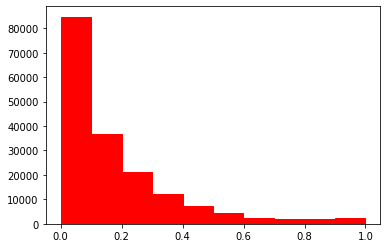

In [ ]:
print("rmse 1 star:",sklearn.metrics.mean_squared_error(newarr1_test, newarr1, squared=False))
print("rmse 2 star:",sklearn.metrics.mean_squared_error(newarr2_test, newarr2, squared=False))
print("rmse 3 star:",sklearn.metrics.mean_squared_error(newarr3_test, newarr3, squared=False))
print("rmse 4 star:",sklearn.metrics.mean_squared_error(newarr4_test, newarr4, squared=False))
print("rmse 5 star:",sklearn.metrics.mean_squared_error(newarr5_test, newarr5, squared=False))

plt.hist(newarr1,  color = "red", ec="red")

(array([13949., 19278., 19308., 16635., 12784.,  8945.,  4402.,  2748.,
         1911.,  1560.]),
 array([0.00165434, 0.10128449, 0.20091464, 0.30054477, 0.40017492,
        0.49980506, 0.5994352 , 0.6990654 , 0.7986955 , 0.8983257 ,
        0.9979558 ], dtype=float32),
 <a list of 10 Patch objects>)

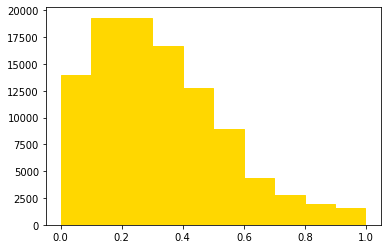

In [ ]:
plt.hist(newarr2,  color = "gold", ec="gold")

(array([ 2942.,  7704., 12886., 18430., 26271., 33760., 23341., 17859.,
        13433., 13600.]),
 array([0.00448084, 0.10391191, 0.20334297, 0.30277404, 0.4022051 ,
        0.5016362 , 0.60106725, 0.70049834, 0.7999294 , 0.8993605 ,
        0.9987915 ], dtype=float32),
 <a list of 10 Patch objects>)

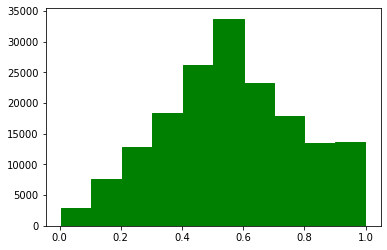

In [ ]:
plt.hist(newarr3,  color = "green", ec="green")

(array([   435.,   1041.,   2120.,   4115.,   7570.,  17609.,  28467.,
         52865.,  67633., 156457.]),
 array([0.00316338, 0.10278488, 0.20240639, 0.30202788, 0.40164942,
        0.5012709 , 0.6008924 , 0.7005139 , 0.80013543, 0.8997569 ,
        0.99937844], dtype=float32),
 <a list of 10 Patch objects>)

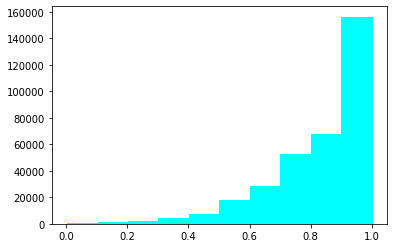

In [ ]:
plt.hist(newarr4,  color = "cyan", ec="cyan")

(array([5.32000e+02, 9.23000e+02, 1.49200e+03, 2.29600e+03, 3.67100e+03,
        6.68500e+03, 1.24270e+04, 3.04720e+04, 9.49210e+04, 1.20122e+06]),
 array([0.00258519, 0.10228106, 0.20197693, 0.3016728 , 0.40136865,
        0.50106454, 0.6007604 , 0.70045626, 0.8001521 , 0.899848  ,
        0.99954385], dtype=float32),
 <a list of 10 Patch objects>)

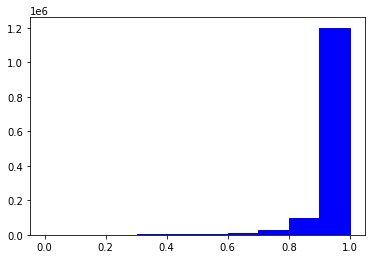

In [ ]:
plt.hist(newarr5,  color = "blue", ec="blue")

(array([1.31000e+02, 1.81000e+02, 2.20000e+02, 2.63000e+02, 2.97000e+02,
        3.63000e+02, 4.41000e+02, 4.99000e+02, 5.52000e+02, 6.62000e+02,
        7.64000e+02, 8.70000e+02, 1.04100e+03, 1.23700e+03, 1.39300e+03,
        1.69400e+03, 2.34700e+03, 2.64400e+03, 3.25100e+03, 4.08000e+03,
        5.09600e+03, 6.77500e+03, 9.58500e+03, 1.41120e+04, 2.01280e+04,
        2.87590e+04, 4.60340e+04, 9.43190e+04, 2.17202e+05, 8.89699e+05]),
 array([0.00258519, 0.03581714, 0.0690491 , 0.10228106, 0.13551301,
        0.16874497, 0.20197693, 0.23520887, 0.26844084, 0.3016728 ,
        0.33490473, 0.3681367 , 0.40136865, 0.43460062, 0.46783257,
        0.50106454, 0.53429645, 0.5675284 , 0.6007604 , 0.6339923 ,
        0.6672243 , 0.70045626, 0.7336882 , 0.76692015, 0.8001521 ,
        0.8333841 , 0.866616  , 0.899848  , 0.93307996, 0.9663119 ,
        0.99954385], dtype=float32),
 <a list of 1 Patch objects>)

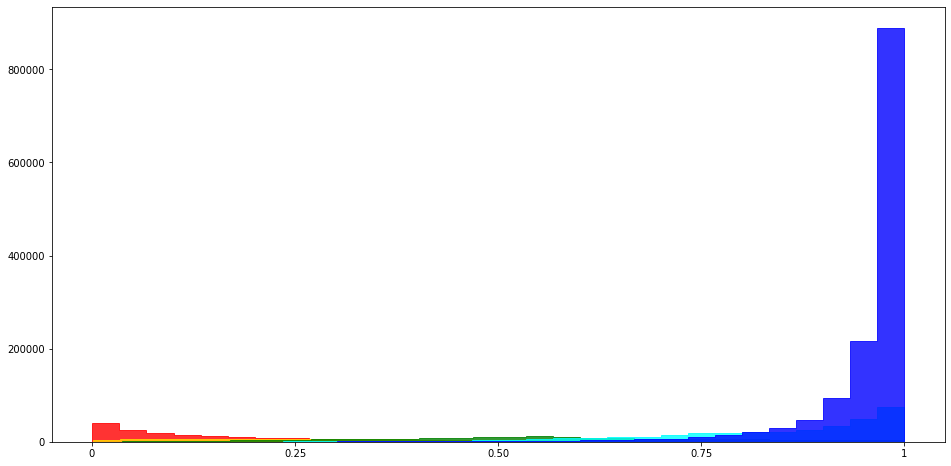

In [ ]:
plot_df1 = pd.DataFrame(newarr1, columns = ['A'])
plot_df2 = pd.DataFrame(newarr2, columns = ['A'])
plot_df3 = pd.DataFrame(newarr3, columns = ['A'])
plot_df4 = pd.DataFrame(newarr4, columns = ['A'])
plot_df5 = pd.DataFrame(newarr5, columns = ['A'])

x=[0,0.25,0.5,0.75,1]

values = ['0', '0.25', '0.50', '0.75','1']
#plt.xlabel("Star Rating Predictions")

#names = ['1 Star', '2 Star', '3 Star', '4 Star', '5 Star']

kwargs = dict(histtype='stepfilled', alpha=0.8, bins=30)

plt.figure(figsize=(16, 8))
plt.xticks(x,values)
plt.hist(newarr1, **kwargs, color = "red", ec="red")
plt.hist(newarr2, **kwargs, color = "gold", ec="gold")
plt.hist(newarr3, **kwargs, color = "green", ec="green")
plt.hist(newarr4, **kwargs, color = "cyan", ec="cyan")
plt.hist(newarr5, **kwargs, color = "blue", ec="blue")

#plt.hist([newarr1, newarr2, newarr3, newarr4, newarr5], color=['r','b','g','yellow','magenta'], label=names)
#plt.legend(prop={'size': 10}, title = 'Test Labels')

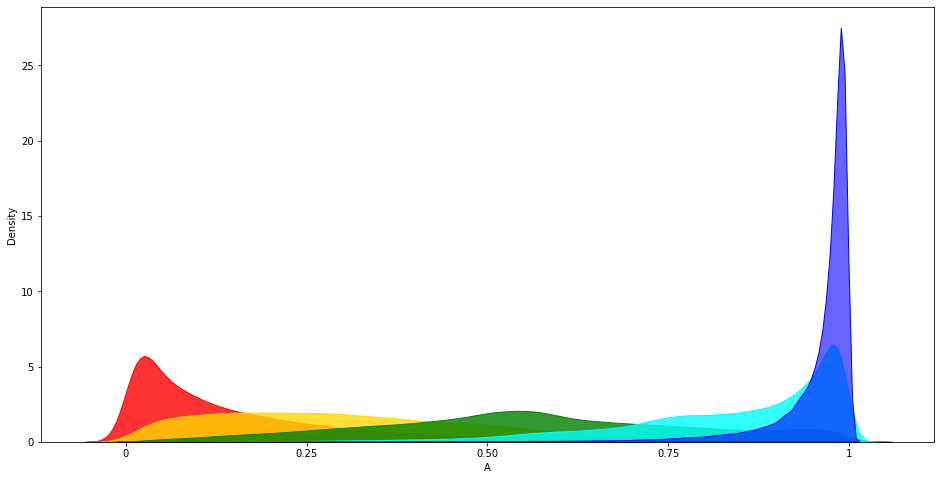

In [ ]:
plt.figure(figsize=(16, 8))

x=[0,0.25,0.5,0.75,1]
values = ['0', '0.25', '0.50', '0.75','1']
plt.xticks(x,values)

fig = sns.kdeplot(plot_df1['A'], shade=True, alpha=0.8, color="red")
fig = sns.kdeplot(plot_df2['A'], shade=True, alpha=0.8, color="gold")
fig = sns.kdeplot(plot_df3['A'], shade=True, alpha=0.8, color="green")
fig = sns.kdeplot(plot_df4['A'], shade=True, alpha=0.8, color="cyan")
fig = sns.kdeplot(plot_df5['A'], shade=True, alpha=0.6, color="blue")
plt.show()